In [1]:
###
### 0. Import packages and references
###

### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..', '..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data Generator/Importer
###

Generator = DataImporter()
# 10^4 data data points
Generator.set_path(os.path.join(mainDirectory, 'src', 'Examples', 'CumulativeDensitiyFunction', 'cdf_deterministic_data.csv'))
Generator.set_inputName('x')
Generator.set_outputName('CDF(x)')
Generator.set_trainTestRatio(0.8)
Generator.set_randomized(False)
Generator.set_trainingSetSizes([100,1000,10000])
Generator.set_dataSeed(1)

###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(20)
Regressor.set_hiddenLayers(3)
Regressor.set_activationFunctionsHidden([tf.nn.tanh])
Regressor.set_weight_seed(1)

###
### 3. Training settings
### 

TrainSettings = TrainingSettings()
TrainSettings.set_epochs(20)
TrainSettings.set_batches_per_epoch(10)

###
### 4. Train and evaluate
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, yTest, Generator)

GPU support =  False

size 100


AttributeError: 'TrainingSettings' object has no attribute '_learning_rate_schedule'


size 100

size 1000

size 10000


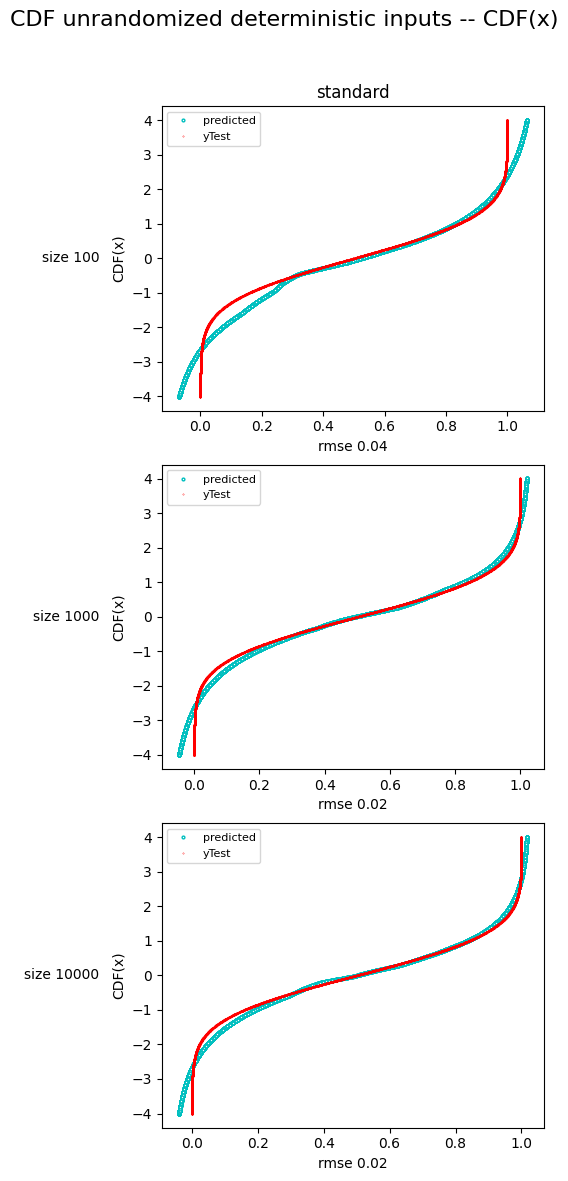

In [ ]:
Generator.set_randomized(True)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, yTest, Generator)


size 100

size 1000

size 10000


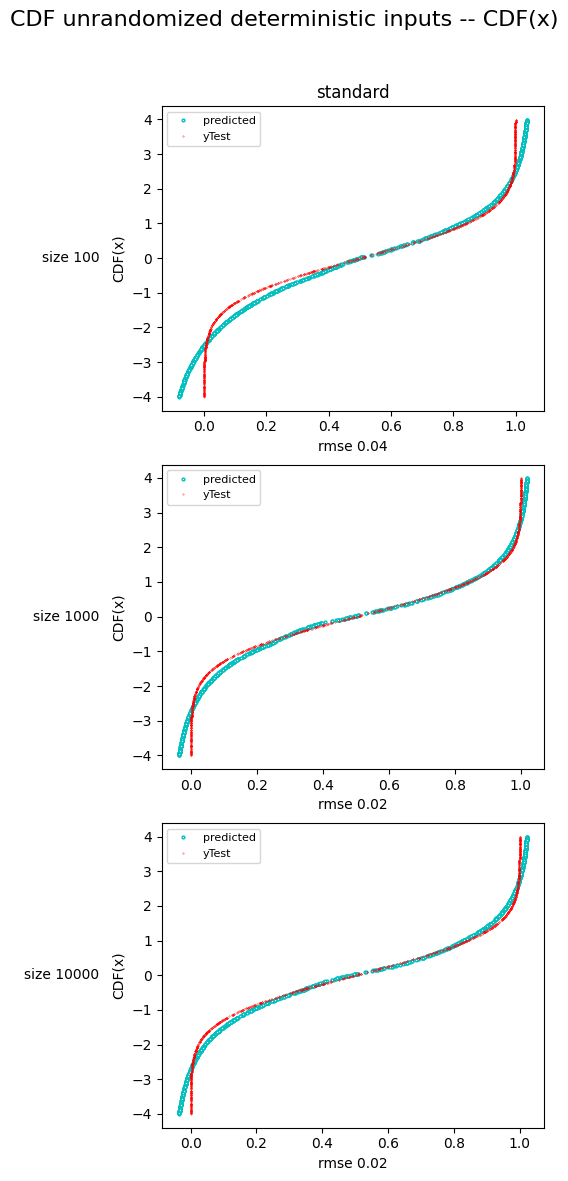

In [ ]:
Generator.set_path(os.path.join(mainDirectory, 'src', 'Examples', 'CumulativeDensitiyFunction', 'cdf_randomInputs_data.csv'))
Generator.set_randomized(False)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("CDF unrandomized deterministic inputs", yPredicted, xTest, yTest, Generator)

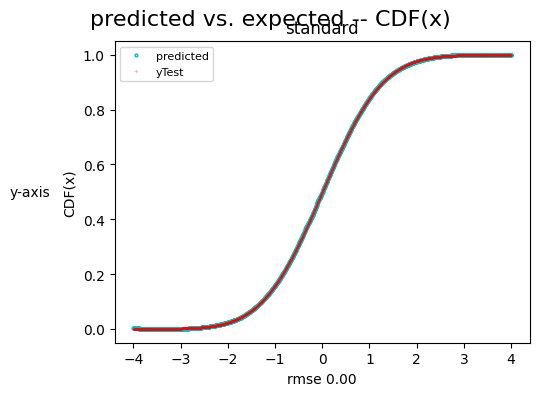

In [ ]:
Generator = CDF()
Generator.set_inputName('x')
Generator.set_outputName('CDF(x)')

###
### 2. Set Nueral network structure / Hyperparameters
### 

TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(10)
TrainSettings.set_nTest(2000)
TrainSettings.set_samplesPerStep(1000)
TrainSettings.set_trainingSteps(10)

###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted = train_and_test(Generator, Regressor, TrainSettings)
plot_results("predicted vs. expected", yPredicted, xTest, yTest, Generator)